In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load in data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Get familiar with dataset
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [4]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


C:\Users\joel3\AppData\Local\Temp\ipykernel_21840\1251306910.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_means = train.groupby('NObeyesdad').mean()


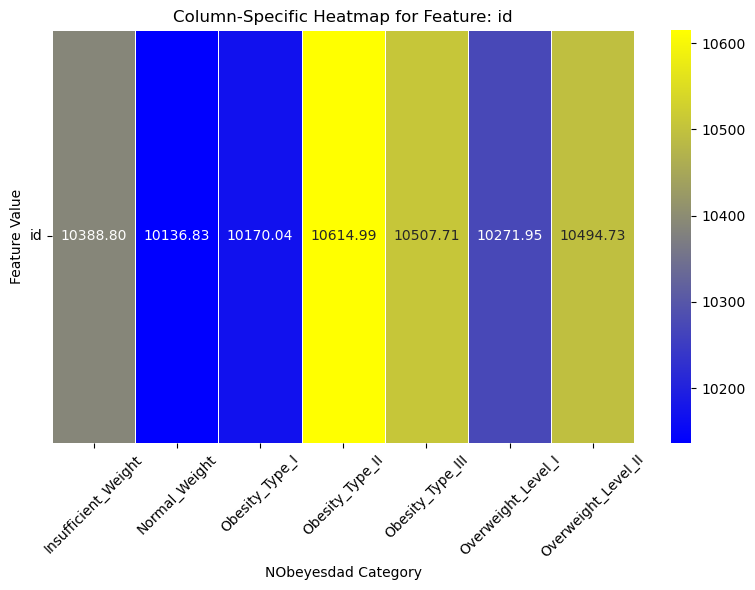

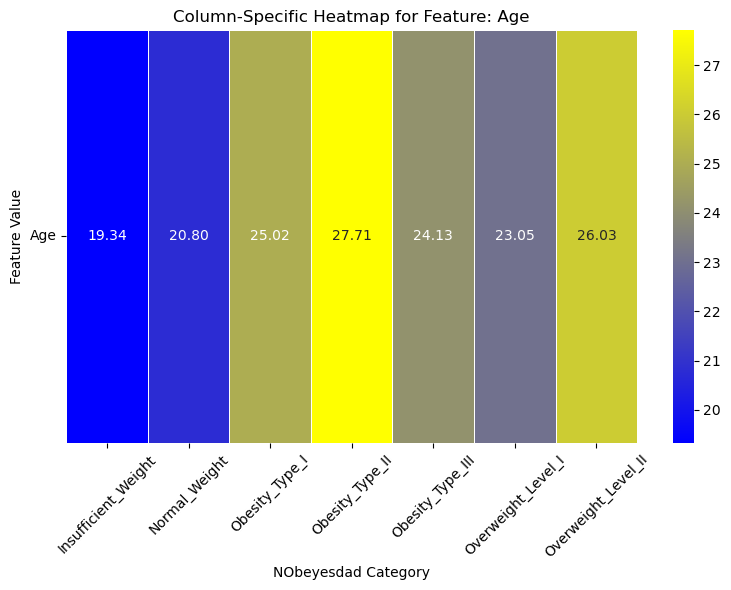

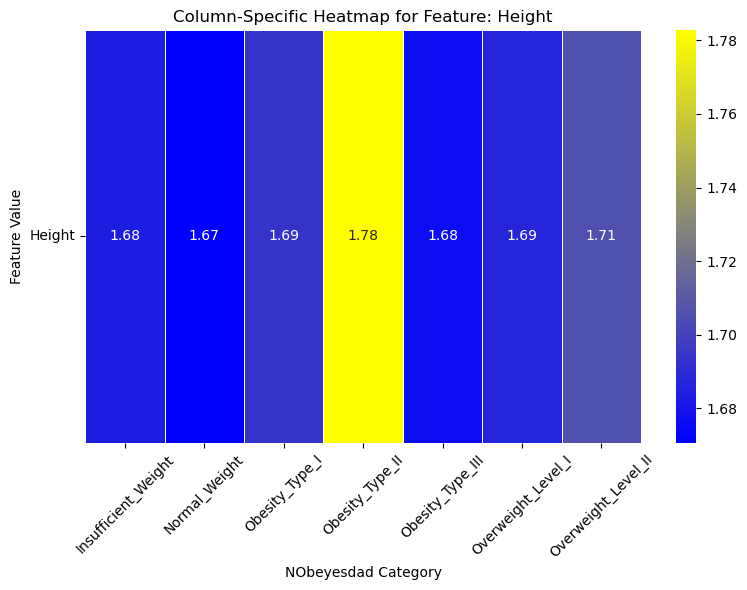

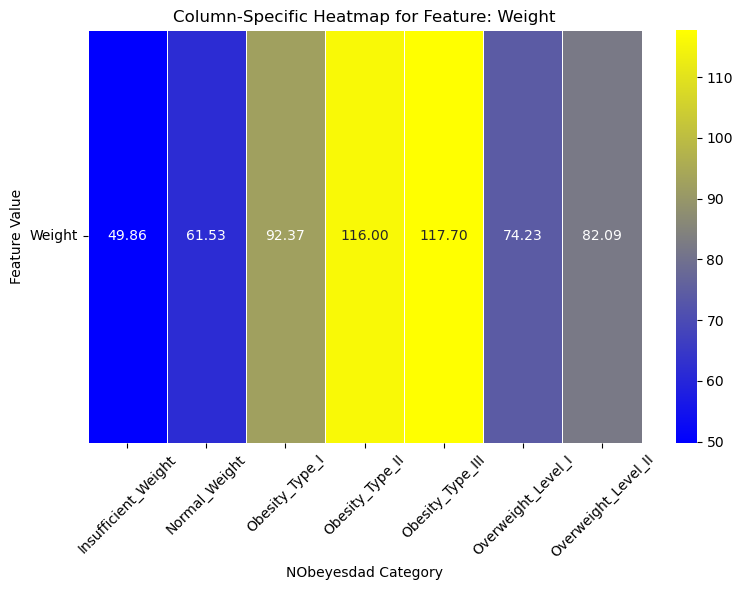

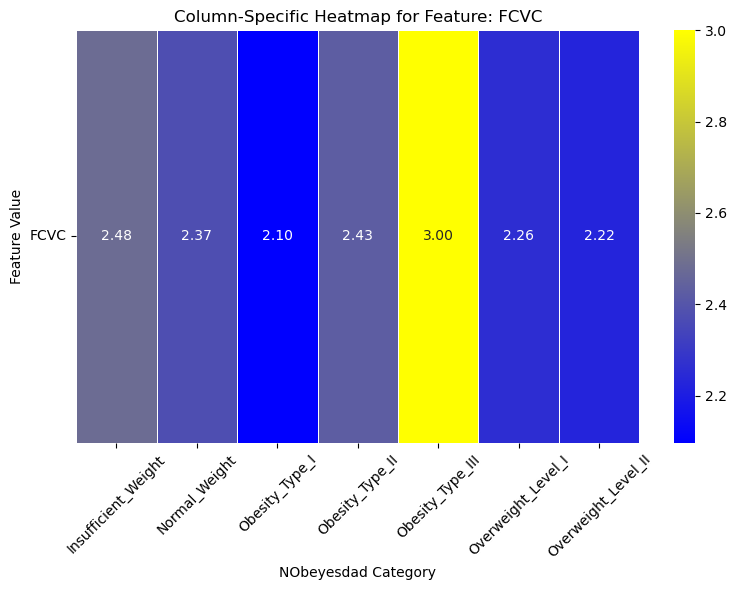

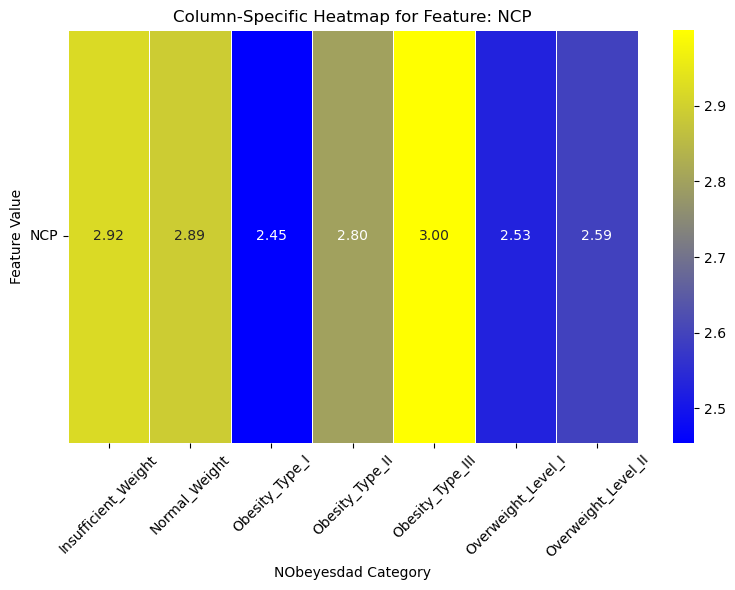

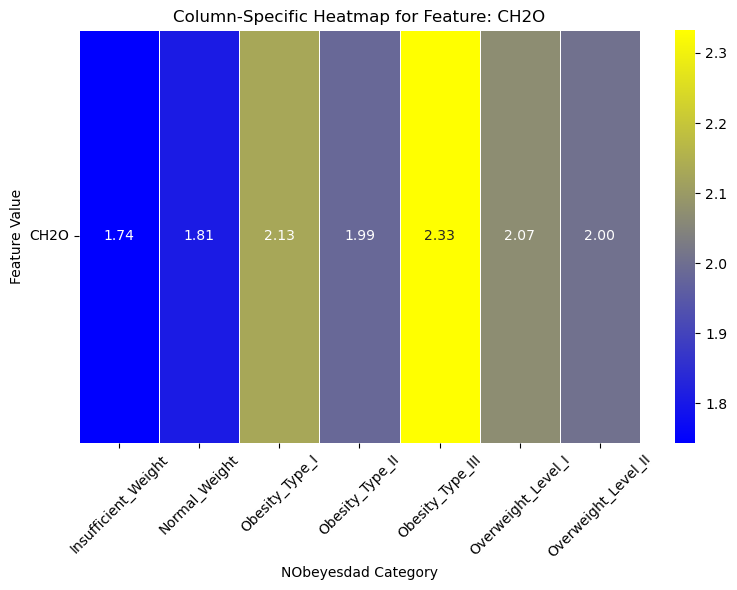

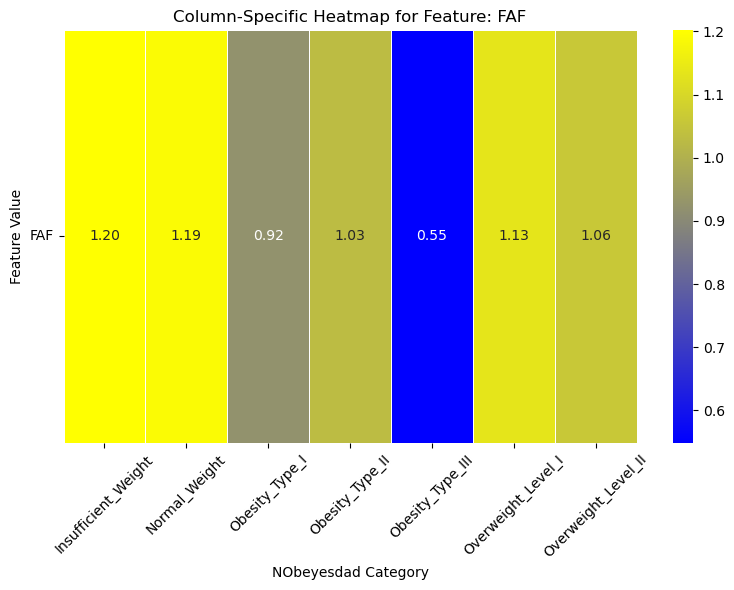

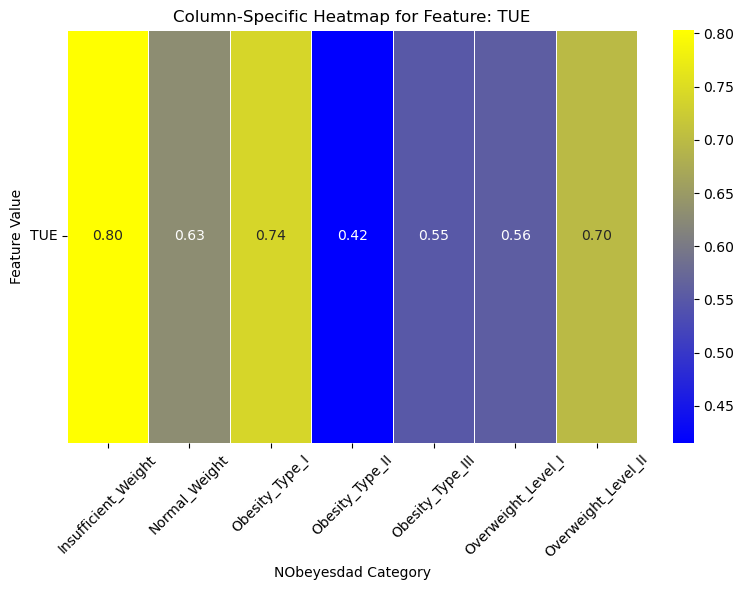

In [5]:
# Analyze the means of different variables by NObeyesdad value
from matplotlib.colors import LinearSegmentedColormap

# Calculate grouped means
grouped_means = train.groupby('NObeyesdad').mean()

# Define custom colormap transitioning from blue to yellow
colors = [(0, 0, 1), (1, 1, 0)]  # Blue to yellow
cmap = LinearSegmentedColormap.from_list('CustomBlueYellow', colors, N=256)

# Iterate over each column (feature) in grouped_means and create a separate heatmap
for feature, data in grouped_means.items():
    # Get the minimum and maximum values for the current feature
    vmin = data.min()
    vmax = data.max()

    # Create heatmap with custom colormap and feature-specific scale
    plt.figure(figsize=(8, 6))
    sns.heatmap(data.to_frame().T, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, vmin=vmin, vmax=vmax)
    plt.title(f'Column-Specific Heatmap for Feature: {feature}')
    plt.xlabel('NObeyesdad Category')
    plt.ylabel('Feature Value')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

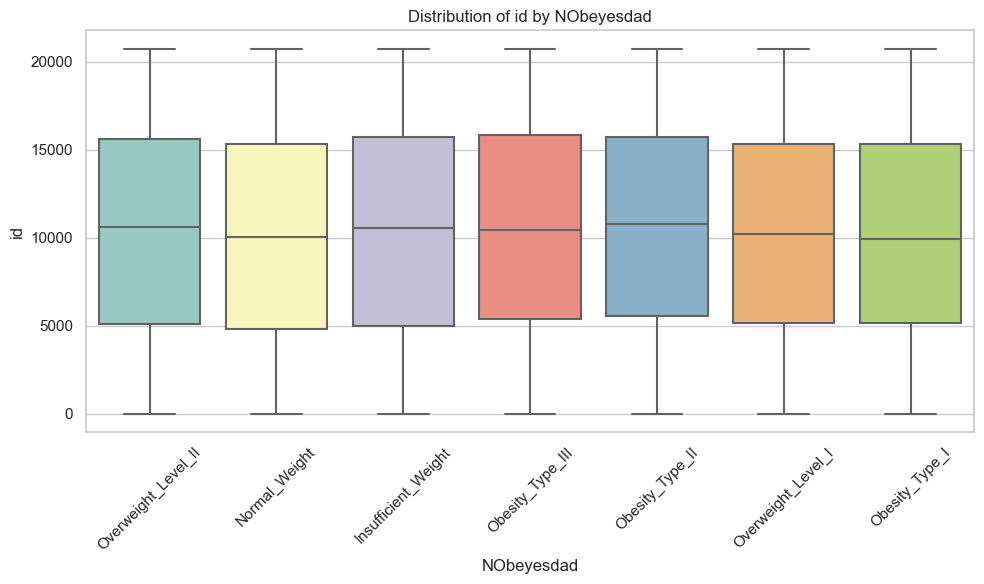

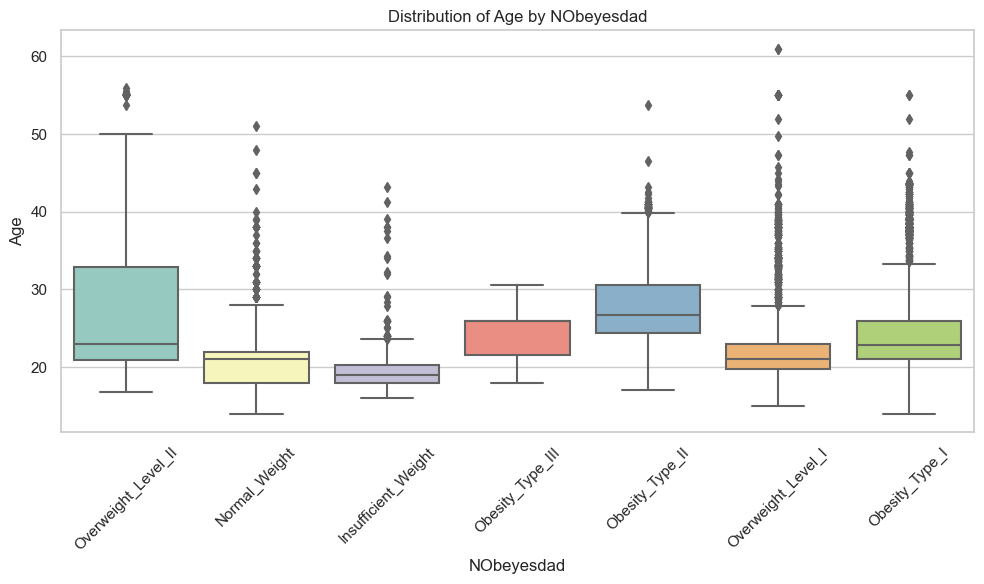

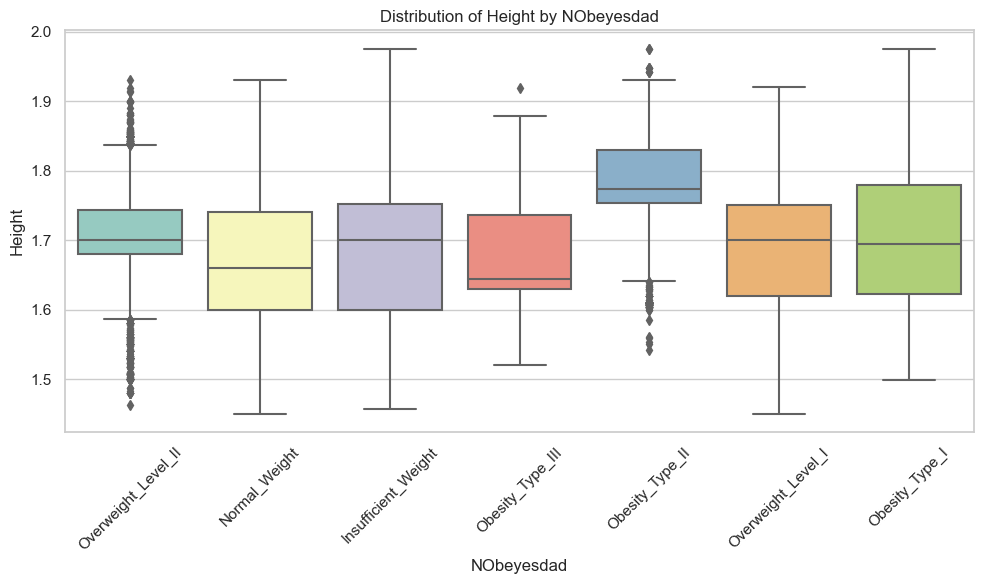

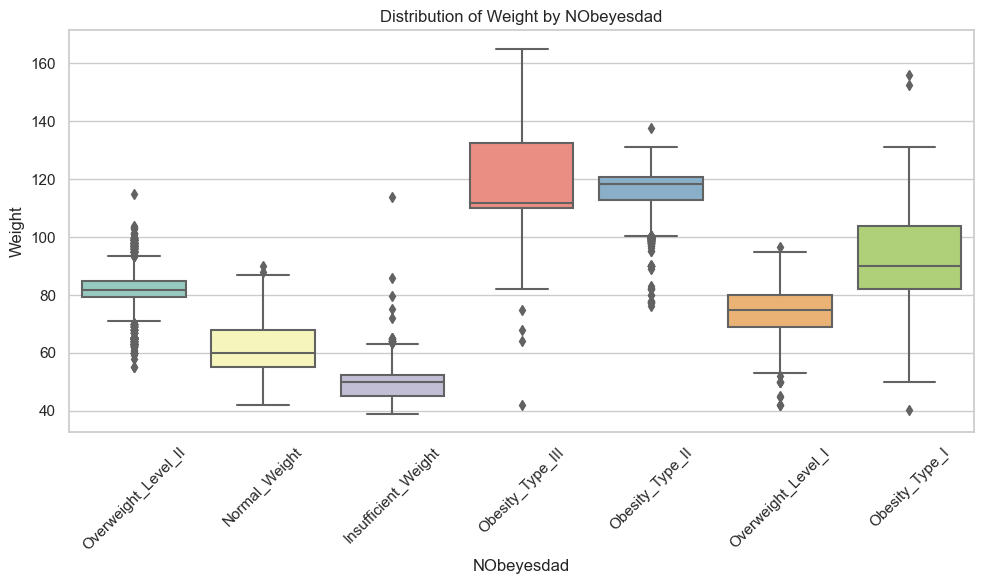

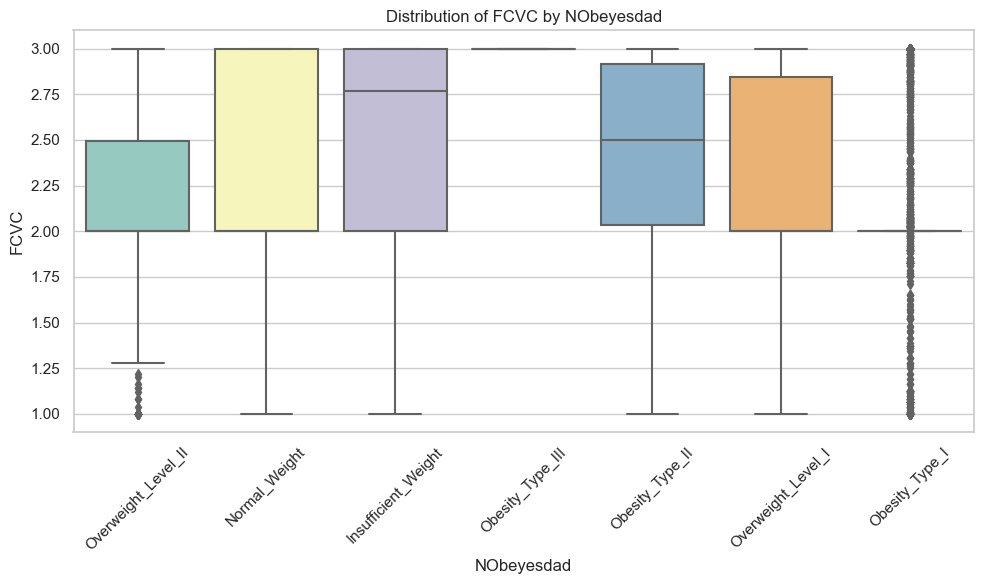

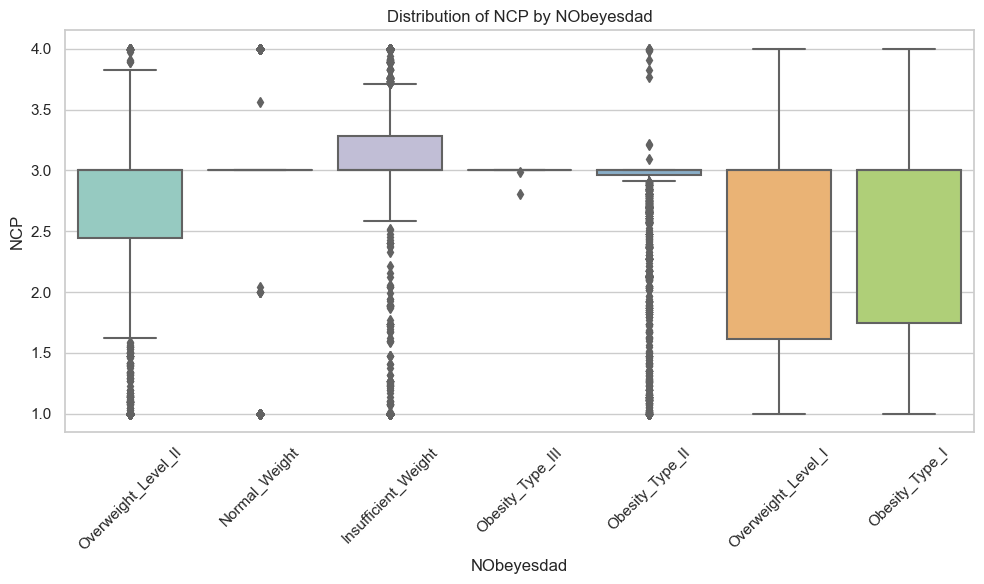

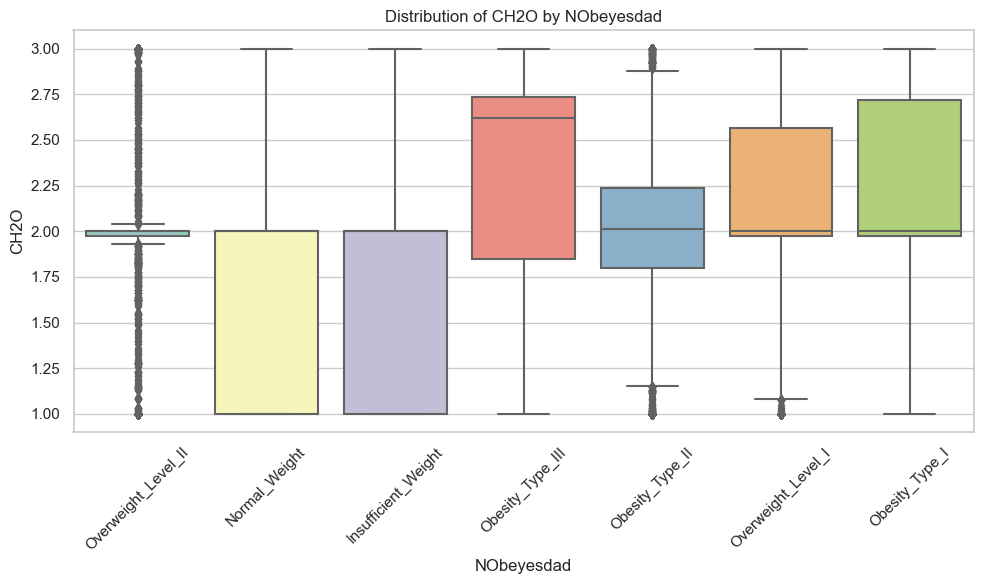

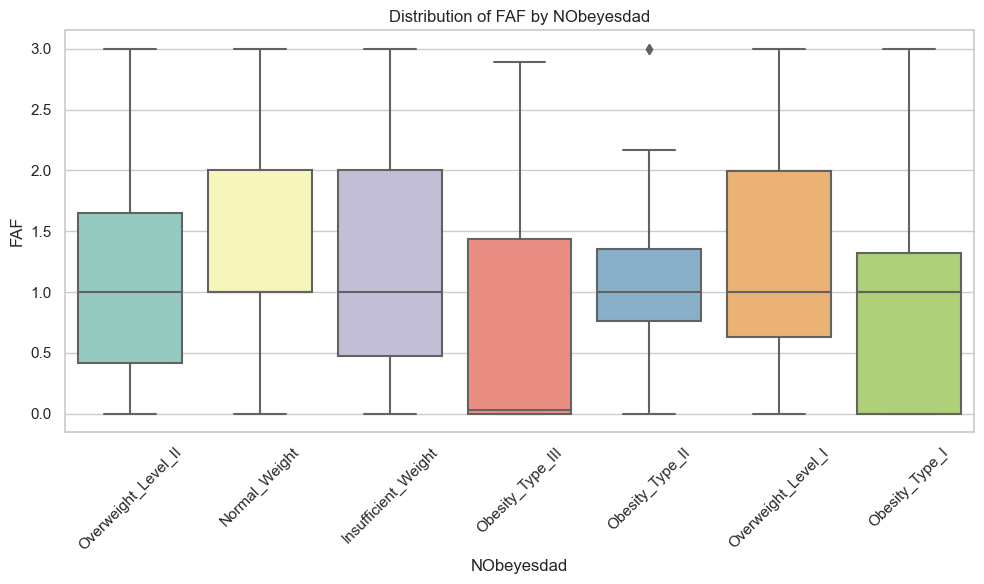

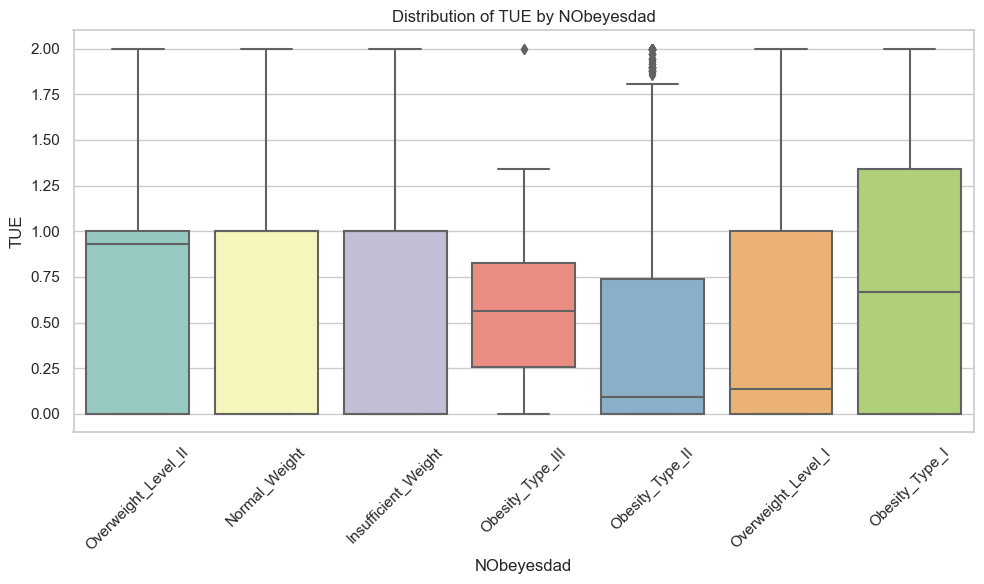

In [6]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Select numerical variables
numerical_variables = train.select_dtypes(include='number').columns

# Plot box plots or violin plots for each numerical variable
for var in numerical_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='NObeyesdad', y=var, data=train, palette="Set3")  # Use 'violinplot' for violin plots
    plt.title(f'Distribution of {var} by NObeyesdad')
    plt.xlabel('NObeyesdad')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

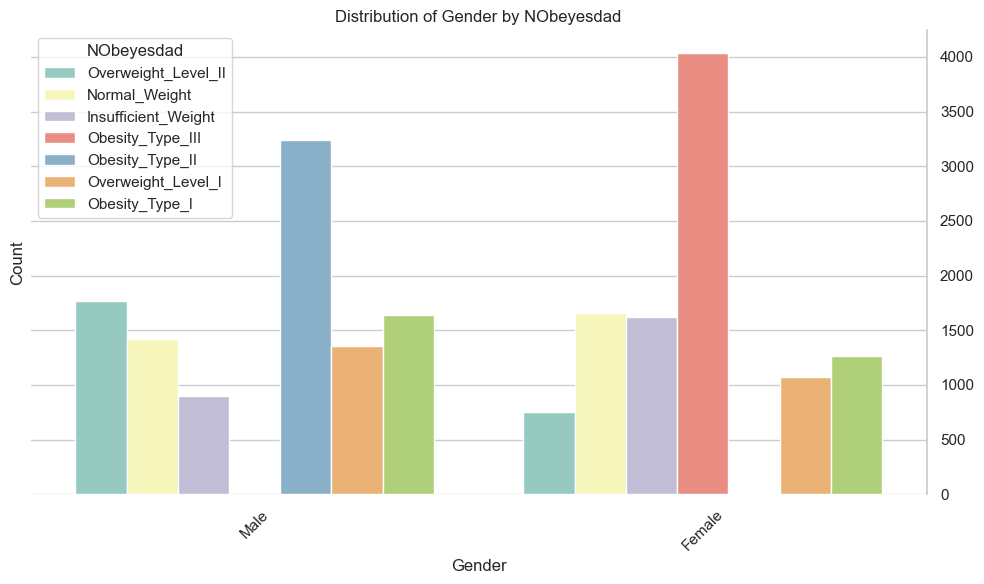

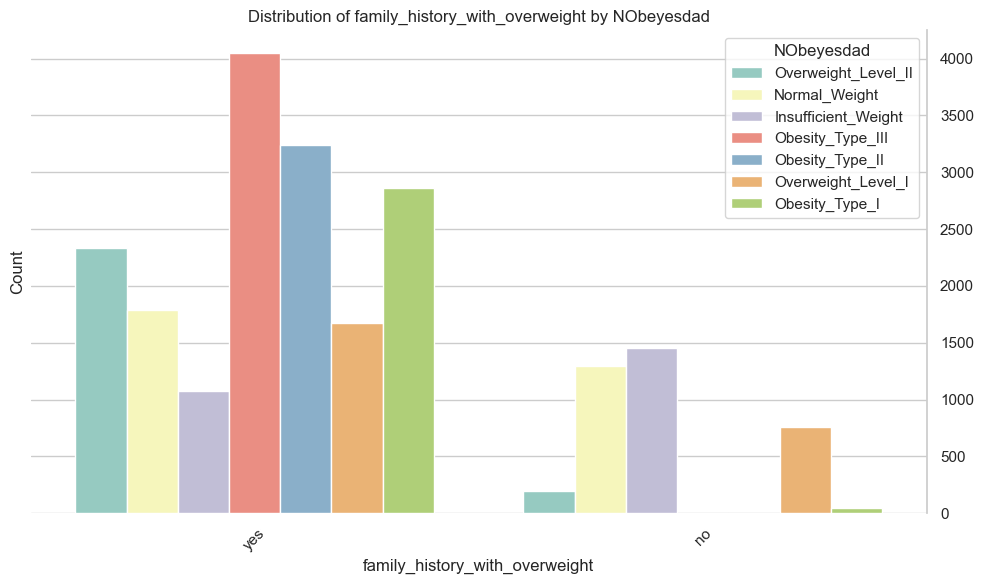

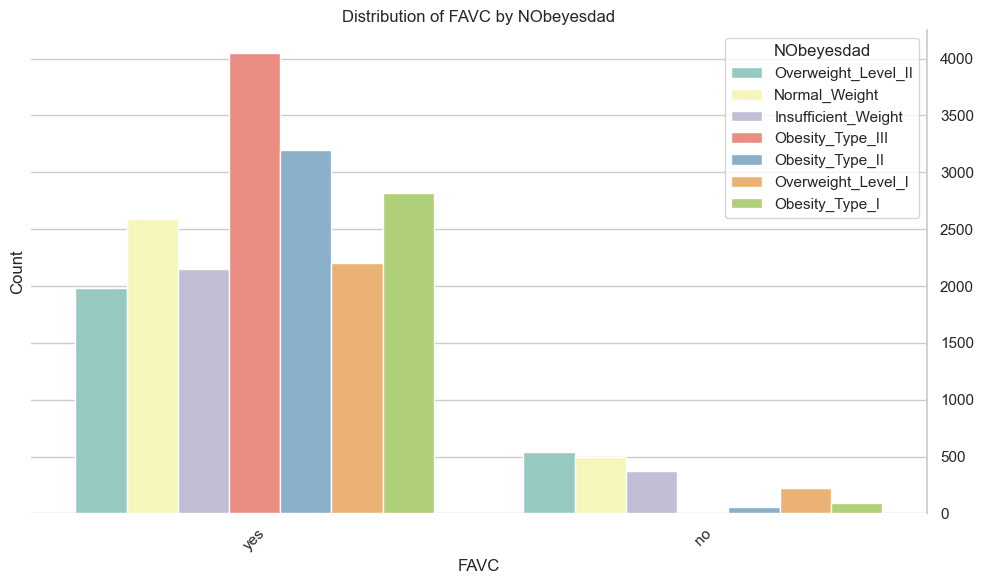

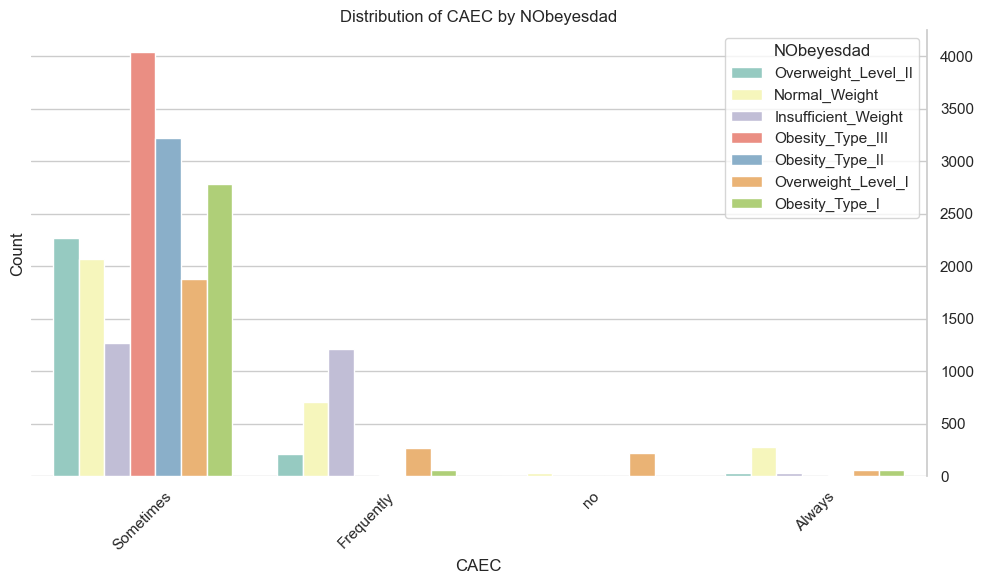

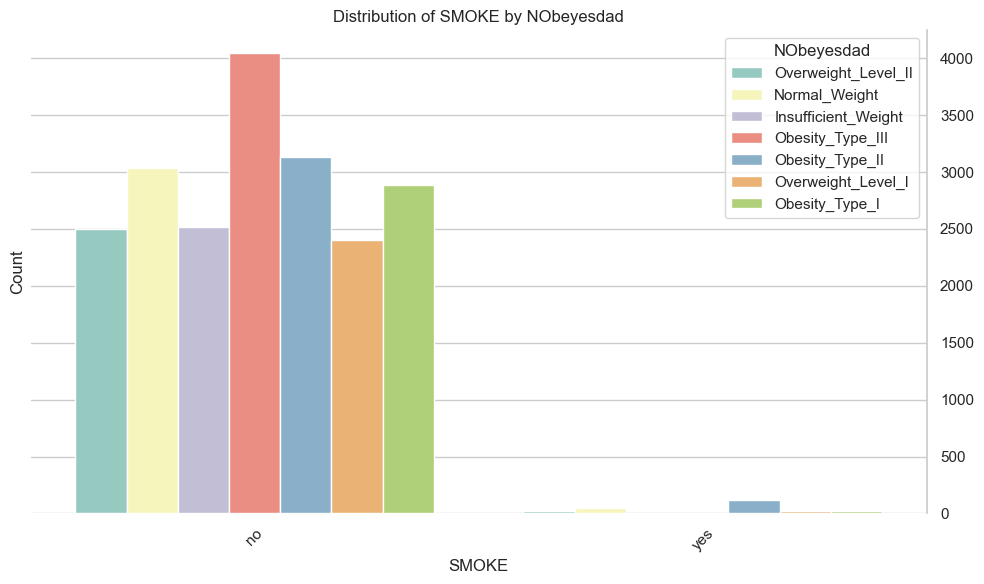

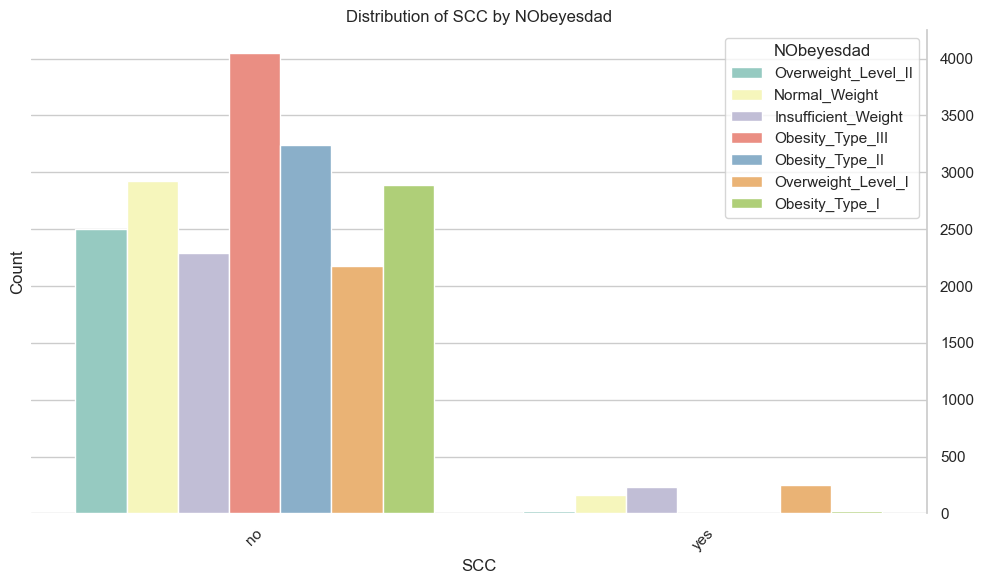

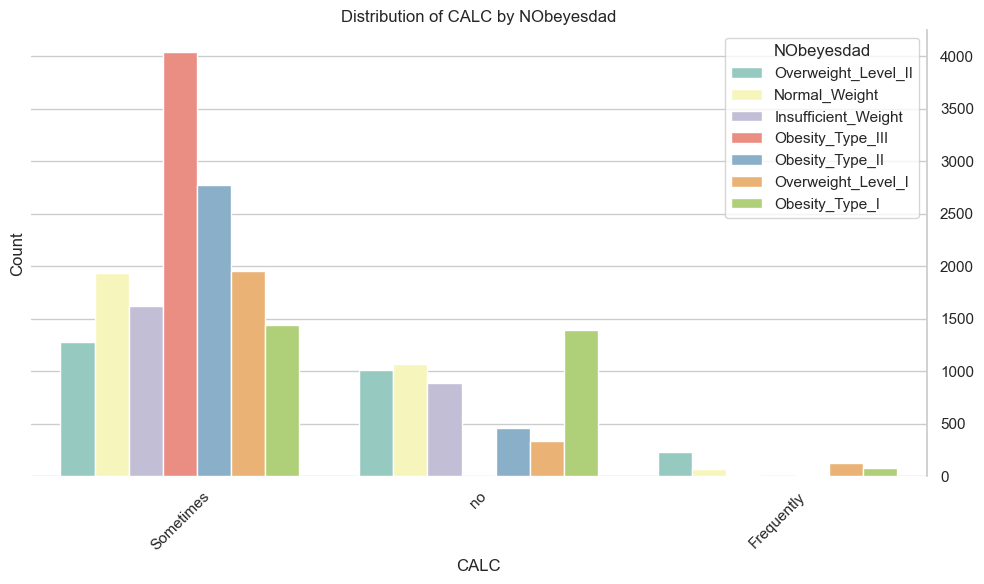

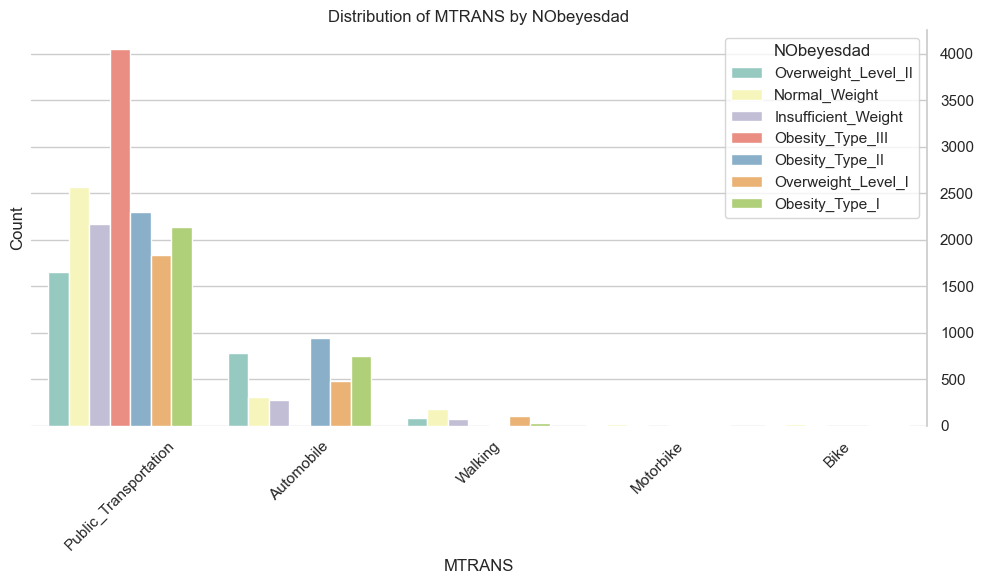

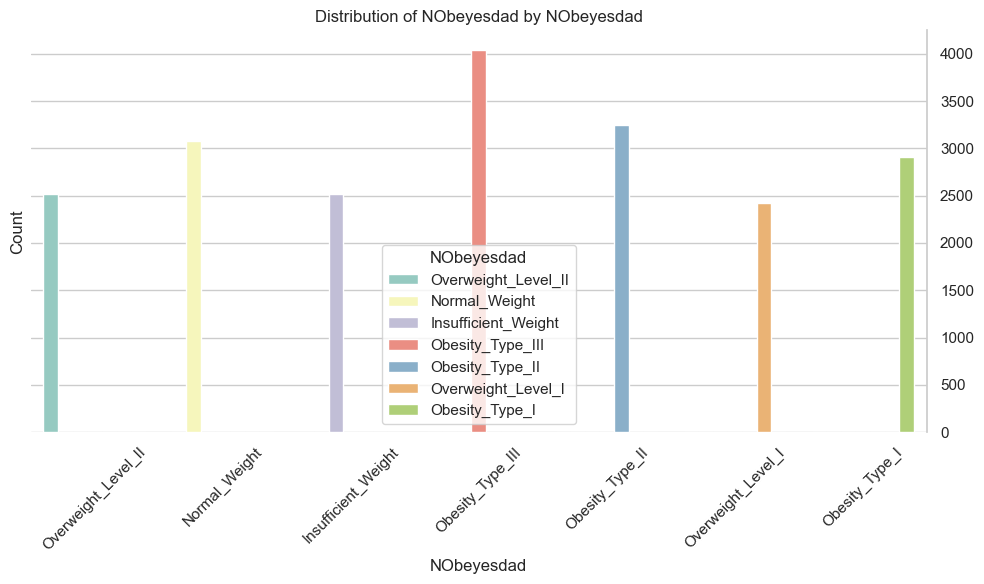

In [7]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Select categorical variables
categorical_variables = train.select_dtypes(include='object').columns

# Plot count plots for each categorical variable
for var in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, hue='NObeyesdad', data=train, palette="Set3")
    plt.title(f'Distribution of {var} by NObeyesdad')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Add dashed lines as borders between x values
    sns.despine(bottom=True, left=True, right=False)
    
    plt.tight_layout()
    plt.show()

In [20]:
# Drop variables with little variance or no pattern in obesity levels distribution
columns_to_drop = ['Height', 'SMOKE', 'SCC', 'id', 'TUE', 'FAF']
#FAF
# Drop columns from the train dataset
train.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define your target column
y = train['NObeyesdad']
X = train.drop(columns=['NObeyesdad'])

# Define the encoder for categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')

# Define the column transformer to handle preprocessing for both numerical and categorical columns
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', encoder, categorical_cols)          # One-hot encode categorical features
    ],
    remainder='passthrough'
)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create a pipeline combining preprocessing and classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', rf_classifier)])

# Define parameter distributions for hyperparameter tuning
param_dist = {
    'classifier__n_estimators': [50, 100, 250, 500],
    'classifier__max_depth': [None, 10, 20, 30, 50, 100],
    'classifier__min_samples_split': [2, 5, 10, ],
    'classifier__min_samples_leaf': [1, 2, 3, 5, 10],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform randomized search cross-validation to find the best parameters
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Evaluation on Test Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\joel3\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
145 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joel3\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joel3\anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\joel3\anaconda\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(

Best Parameters: {'classifier__n_estimators': 250, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': None}
Best Accuracy: 0.8604120495683517
Evaluation on Test Data:
Accuracy: 0.8540462427745664
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.90      0.90      0.90       524
      Normal_Weight       0.76      0.82      0.79       626
     Obesity_Type_I       0.83      0.82      0.82       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.72      0.62      0.67       484
Overweight_Level_II       0.69      0.73      0.71       514

           accuracy                           0.85      4152
          macro avg       0.84      0.84      0.84      4152
       weighted avg       0.85      0.85      0.85      4152

Confusion Matrix:
 [[469

In [12]:
# Drop variables with little variance or no pattern in obesity levels distribution
columns_to_drop = ['Height', 'SMOKE', 'SCC', 'TUE', 'FAF']
#FAF
# Drop columns from the train dataset
test.drop(columns_to_drop, axis=1, inplace=True)

# Predict the target variable using the trained model
test_predictions = best_model.predict(test)

# Create a DataFrame containing 'id' and 'obesity level rf' columns
predictions_df = pd.DataFrame({'id': test['id'], 'obesity level rf': test_predictions})

# Save the DataFrame to a CSV file
#predictions_df.to_csv('predictions.csv', index=False)

KeyError: "['Height', 'SMOKE', 'SCC', 'TUE', 'FAF'] not found in axis"

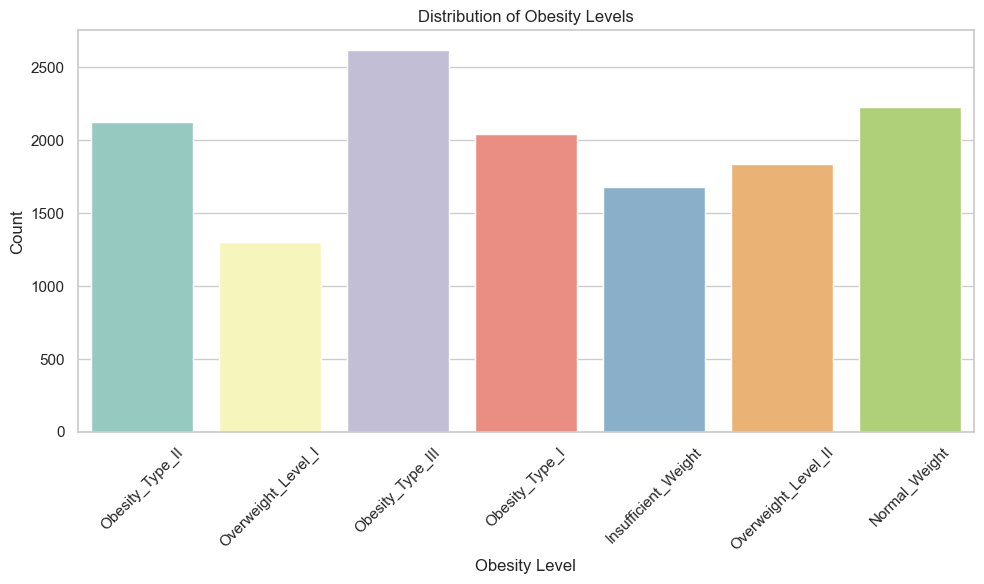

In [16]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='obesity level rf', data=predictions_df, palette="Set3")
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define your target column
y = train['NObeyesdad']
X = train.drop(columns=['NObeyesdad'])

# Define the encoder for categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')

# Define the column transformer to handle preprocessing for both numerical and categorical columns
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', encoder, categorical_cols)          # One-hot encode categorical features
    ],
    remainder='passthrough'
)

# Define the Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000)

# Create a pipeline combining preprocessing and classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', log_reg_classifier)])

# Define parameter distributions for hyperparameter tuning
param_dist = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],           # Penalty norm
    'classifier__solver': ['liblinear', 'saga']    # Solver for optimization
}

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform randomized search cross-validation to find the best parameters
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Evaluation on Test Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\joel3\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\joel3\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\joel3\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\joel3\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\joel3\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\joel3\anaconda\Lib\site-packages\sklearn\lin

Best Parameters: {'classifier__solver': 'saga', 'classifier__penalty': 'l1', 'classifier__C': 1}
Best Accuracy: 0.8141633314787894
Evaluation on Test Data:
Accuracy: 0.8188824662813102
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.83      0.90      0.86       524
      Normal_Weight       0.76      0.73      0.74       626
     Obesity_Type_I       0.74      0.82      0.78       543
    Obesity_Type_II       0.96      0.96      0.96       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.67      0.61      0.64       484
Overweight_Level_II       0.63      0.58      0.61       514

           accuracy                           0.82      4152
          macro avg       0.80      0.80      0.80      4152
       weighted avg       0.82      0.82      0.82      4152

Confusion Matrix:
 [[470  52   1   0   0   1   0]
 [ 96 459   1   0   0  61   9]
 [  1   1 443  21   3   8  66]
 [  0

In [23]:
# Predict the target variable using the trained model
test_predictions = best_model.predict(test)

# Create a DataFrame containing 'id' and 'obesity level rf' columns
predictions_df2 = pd.DataFrame({'id': test['id'], 'obesity level rf': test_predictions})

# Save the DataFrame to a CSV file
predictions_df2.to_csv('predictions2.csv', index=False)

In [27]:
predictions1 = pd.read_csv('predictions.csv')
predictions2 = pd.read_csv('predictions2.csv')

# Joining predictions1 with predictions2 based on the 'id' column
merged_predictions = predictions1.merge(predictions2, on='id', suffixes=('_pred1', '_pred2'))

# Displaying the merged DataFrame
print(merged_predictions)

# Comparing the two columns element-wise and counting the matches
matches = (merged_predictions['obesity level rf_pred1'] == merged_predictions['obesity level rf_pred2']).sum()

# Calculating the total number of elements
total_elements = len(merged_predictions)

# Calculating the percentage of matches
percentage_matches = (matches / total_elements) * 100

# Displaying the result
print(f"Percentage of times 'obesity level rf_pred1' equals 'obesity level rf_pred2': {percentage_matches:.2f}%")



          id obesity level rf_pred1 obesity level rf_pred2
0      20758        Obesity_Type_II        Obesity_Type_II
1      20759     Overweight_Level_I     Overweight_Level_I
2      20760       Obesity_Type_III       Obesity_Type_III
3      20761         Obesity_Type_I         Obesity_Type_I
4      20762       Obesity_Type_III       Obesity_Type_III
...      ...                    ...                    ...
13835  34593    Overweight_Level_II    Overweight_Level_II
13836  34594          Normal_Weight          Normal_Weight
13837  34595    Insufficient_Weight    Insufficient_Weight
13838  34596    Insufficient_Weight    Insufficient_Weight
13839  34597        Obesity_Type_II        Obesity_Type_II

[13840 rows x 3 columns]
Percentage of times 'obesity level rf_pred1' equals 'obesity level rf_pred2': 86.52%


In [28]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define your target column
y = train['NObeyesdad']
X = train.drop(columns=['NObeyesdad'])

# Define the encoder for categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')

# Define the column transformer to handle preprocessing for both numerical and categorical columns
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', encoder, categorical_cols)          # One-hot encode categorical features
    ],
    remainder='passthrough'
)

# Define the MLP Classifier
mlp_classifier = MLPClassifier(max_iter=1000)

# Create a pipeline combining preprocessing and classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', mlp_classifier)])

# Define parameter distributions for hyperparameter tuning
param_dist = {
    'classifier__hidden_layer_sizes': [(100,), (50, 50), (100, 50), (50, 25, 10)],  # Size of hidden layers
    'classifier__activation': ['logistic', 'tanh', 'relu'],  # Activation function
    'classifier__alpha': [0.0001, 0.001, 0.01, 0.1],          # L2 penalty parameter
}

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform randomized search cross-validation to find the best parameters
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Evaluation on Test Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\joel3\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\joel3\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\joel3\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\joel3\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\joel3\anaconda\Lib\site-packages\sklearn\neural_network\

Best Parameters: {'classifier__hidden_layer_sizes': (100, 50), 'classifier__alpha': 0.1, 'classifier__activation': 'tanh'}
Best Accuracy: 0.845658218974323
Evaluation on Test Data:
Accuracy: 0.8403179190751445
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.85      0.88      0.87       524
      Normal_Weight       0.75      0.76      0.76       626
     Obesity_Type_I       0.79      0.83      0.81       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.71      0.60      0.65       484
Overweight_Level_II       0.69      0.71      0.70       514

           accuracy                           0.84      4152
          macro avg       0.82      0.82      0.82      4152
       weighted avg       0.84      0.84      0.84      4152

Confusion Matrix:
 [[459  63   0   0   0   1   1]
 [ 76 477   1   0   0  60  12]
 [  1   1 4

In [29]:
# Predict the target variable using the trained model
test_predictions = best_model.predict(test)

# Create a DataFrame containing 'id' and 'obesity level rf' columns
predictions_df3 = pd.DataFrame({'id': test['id'], 'obesity level rf': test_predictions})

# Save the DataFrame to a CSV file
predictions_df3.to_csv('predictions3.csv', index=False)

In [31]:
predictions3 = pd.read_csv('predictions3.csv')

# Joining predictions1 with predictions2 based on the 'id' column
merged_predictions = merged_predictions.merge(predictions3, on='id')

merged_predictions.rename(columns={'obesity level rf_pred1': 'Rand_for_pred', 'obesity level rf_pred2': 'Log_pred', 'obesity level rf': 'neur_net_pred'}, inplace=True)

# Displaying the merged DataFrame
print(merged_predictions)

          id        Rand_for_pred             Log_pred        neur_net_pred
0      20758      Obesity_Type_II      Obesity_Type_II      Obesity_Type_II
1      20759   Overweight_Level_I   Overweight_Level_I   Overweight_Level_I
2      20760     Obesity_Type_III     Obesity_Type_III     Obesity_Type_III
3      20761       Obesity_Type_I       Obesity_Type_I       Obesity_Type_I
4      20762     Obesity_Type_III     Obesity_Type_III     Obesity_Type_III
...      ...                  ...                  ...                  ...
13835  34593  Overweight_Level_II  Overweight_Level_II  Overweight_Level_II
13836  34594        Normal_Weight        Normal_Weight        Normal_Weight
13837  34595  Insufficient_Weight  Insufficient_Weight  Insufficient_Weight
13838  34596  Insufficient_Weight  Insufficient_Weight  Insufficient_Weight
13839  34597      Obesity_Type_II      Obesity_Type_II      Obesity_Type_II

[13840 rows x 4 columns]


In [35]:
# Count the number of times all prediction columns within the same row are equal
merged_predictions['all_equal'] = (merged_predictions['Rand_for_pred'] == merged_predictions['Log_pred']) & (merged_predictions['Log_pred'] == merged_predictions['neur_net_pred'])

# Count the number of times only neu_net_pred and rand_for_pred are equal to each other
merged_predictions['neu_net_rand_equal'] = (merged_predictions['Rand_for_pred'] == merged_predictions['neur_net_pred']) & (merged_predictions['Log_pred'] != merged_predictions['Rand_for_pred'])

# Count the number of times only neu_net_pred and log_pred are equal to each other
merged_predictions['neu_net_log_equal'] = (merged_predictions['neur_net_pred'] == merged_predictions['Log_pred']) & (merged_predictions['Log_pred'] != merged_predictions['Rand_for_pred'])

# Count the number of times only log_pred and rand_for_pred are equal to each other
merged_predictions['log_rand_equal'] = (merged_predictions['Log_pred'] == merged_predictions['Rand_for_pred']) & (merged_predictions['Log_pred'] != merged_predictions['neur_net_pred'])

# Count the number of observations that have different values for each prediction
merged_predictions['all_different'] = (merged_predictions['Rand_for_pred'] != merged_predictions['Log_pred']) & (merged_predictions['Log_pred'] != merged_predictions['neur_net_pred']) & (merged_predictions['Rand_for_pred'] != merged_predictions['neur_net_pred'])

# Count occurrences for each condition
counts = {
    'all_equal': merged_predictions['all_equal'].sum(),
    'neu_net_rand_equal': merged_predictions['neu_net_rand_equal'].sum(),
    'neu_net_log_equal': merged_predictions['neu_net_log_equal'].sum(),
    'log_rand_equal': merged_predictions['log_rand_equal'].sum(),
    'all_different': merged_predictions['all_different'].sum()
}

print(counts)

{'all_equal': 11637, 'neu_net_rand_equal': 1041, 'neu_net_log_equal': 773, 'log_rand_equal': 337, 'all_different': 52}


In [50]:
def most_common(row):
    if row['Rand_for_pred'] == row['Log_pred'] == row['neur_net_pred']:
        return row['Rand_for_pred']
    elif row['Rand_for_pred'] == row['Log_pred'] or row['Rand_for_pred'] == row['neur_net_pred']:
        return row['Rand_for_pred']
    elif row['Log_pred'] == row['neur_net_pred']:
        return row['Log_pred']
    else:
        return row['Rand_for_pred']

# Apply the function to create the new column
merged_predictions['most_common_pred'] = merged_predictions.apply(most_common, axis=1)

print(merged_predictions)

          id        Rand_for_pred             Log_pred        neur_net_pred  \
0      20758      Obesity_Type_II      Obesity_Type_II      Obesity_Type_II   
1      20759   Overweight_Level_I   Overweight_Level_I   Overweight_Level_I   
2      20760     Obesity_Type_III     Obesity_Type_III     Obesity_Type_III   
3      20761       Obesity_Type_I       Obesity_Type_I       Obesity_Type_I   
4      20762     Obesity_Type_III     Obesity_Type_III     Obesity_Type_III   
...      ...                  ...                  ...                  ...   
13835  34593  Overweight_Level_II  Overweight_Level_II  Overweight_Level_II   
13836  34594        Normal_Weight        Normal_Weight        Normal_Weight   
13837  34595  Insufficient_Weight  Insufficient_Weight  Insufficient_Weight   
13838  34596  Insufficient_Weight  Insufficient_Weight  Insufficient_Weight   
13839  34597      Obesity_Type_II      Obesity_Type_II      Obesity_Type_II   

       all_equal  neu_net_rand_equal  neu_net_log_e

In [56]:
final_predictions = merged_predictions[['id', 'most_common_pred']]

final_predictions.rename(columns={'most_common_pred': 'NObeyesdad'}, inplace=True)

# Save the DataFrame to a CSV file
final_predictions.to_csv('submission.csv', index=False)

C:\Users\joel3\AppData\Local\Temp\ipykernel_21840\2255991785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_predictions.rename(columns={'most_common_pred': 'NObeyesdad'}, inplace=True)
